In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots

In [3]:
train_data = pd.read_csv("/Users/schoch/Documents/0_Vorlesungen/DataScienceFundamentals/IntroductionToDataScience/2023_Git_WWI23B4/TitanicExample/spaceship-titanic/train.csv")

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Beschreibung

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the 

passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship 
Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [6]:
train_data.shape

(8693, 14)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: >

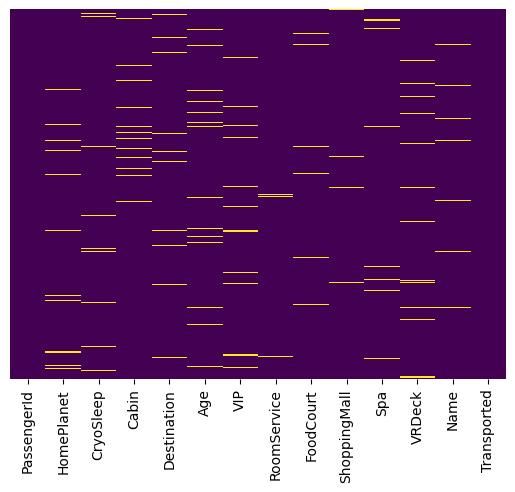

In [8]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [21]:
# Typecast von VIP und CryoSleep als bool
train_data.VIP = train_data.VIP.astype(bool)
train_data.CryoSleep = train_data.CryoSleep.astype(bool)

In [23]:
train_data_numeric = train_data.select_dtypes(include=['number', 'bool'])
train_data_numeric.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True


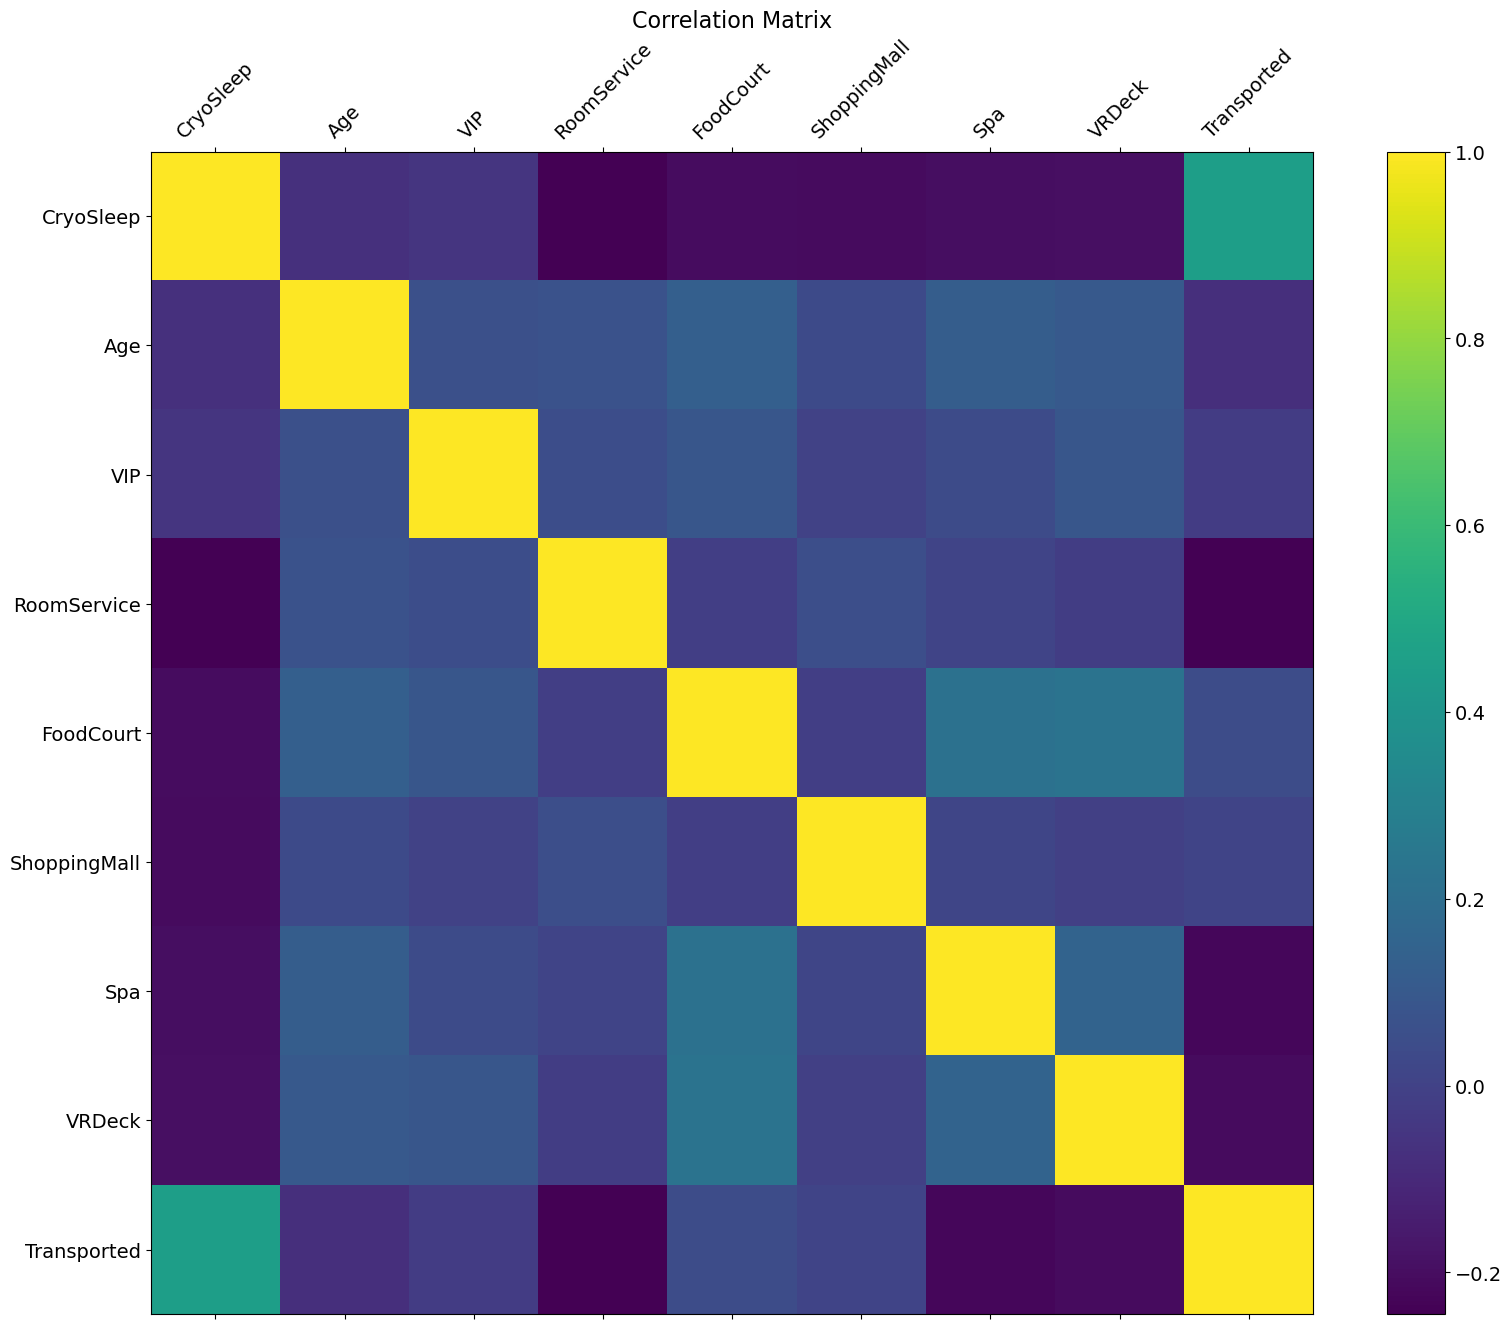

In [24]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train_data_numeric.corr(), fignum=f.number)
plt.xticks(range(train_data_numeric.select_dtypes(['number', 'bool']).shape[1]), train_data_numeric.select_dtypes(['number', 'bool']).columns, fontsize=14, rotation=45)
plt.yticks(range(train_data_numeric.select_dtypes(['number', 'bool']).shape[1]), train_data_numeric.select_dtypes(['number', 'bool']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# CryoSleep scheint stark positiv korreliert mit Transported